# Data Exploration

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib
import matplotlib.pyplot as plt
import nltk 
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline

In [7]:
import os
print(os.getcwd())

g:\Github\NLP\Hate=speech-sinhala


In [2]:
df = pd.read_csv('final-data-set.csv')
#encoding='utf8'
df.head(n=10)

,instance_id,id,user.id,created_at,text,class
0,0,1068438343363387392,1068429951865544704,Fri Nov 30 09:35:26 +0000 2018,"""RT @AmithWeerasing3: 2018-11-27 දින ඒකාබද්ධ ව...",Neutral
1,4,1068015734981152768,1062914938702770176,Thu Nov 29 05:36:08 +0000 2018,"""RT @AmithWeerasing3: මා UNP හෝ ඒකාබද්ධ විපක්ෂ...",Neutral
2,5,1068003223607435264,150942005,Thu Nov 29 04:46:25 +0000 2018,"""@dead_mans_creed @Wind_Desika කිමද මේ තරම් කො...",Neutral
3,10,1067733521052004353,2483063340,Wed Nov 28 10:54:43 +0000 2018,"""@MrThila_ @maalupaan @punchi_kella @anuwa01 @...",Neutral
4,11,1066688783557378049,2203056031,Sun Nov 25 13:43:18 +0000 2018,"""විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා.......",Neutral
5,12,1065238842079367168,927065408,Wed Nov 21 13:41:45 +0000 2018,"""RT @SaliyaT_R: @fernandoharin ලැජ්ජයි ස⁣හෝදරය...",Racist
6,13,1065221534548029441,2876666923,Wed Nov 21 12:32:59 +0000 2018,"""@fernandoharin ලැජ්ජයි ස⁣හෝදරයා මේ යන විදිහ ද...",Racist
7,14,1064804039018377216,3089536357,Tue Nov 20 08:54:00 +0000 2018,"""@She_is_Nu @nthathsaranii ඇයි මං තම්බි වගේද ප...",Neutral
8,15,1063872180180721675,1059653431676276737,Sat Nov 17 19:11:08 +0000 2018,"""@Sagara_9 ඉටිම් බං උතුර ඉල්ලනසෙට් එකයි නැගෙනහ...",Racist
9,16,1063849019661664256,2876666923,Sat Nov 17 17:39:06 +0000 2018,"""RT @SaliyaT_R: පේනවානේ තම්බි කවදත් ඉන්නේ උන්ට...",Racist


## Misisng values

In [3]:
count = df.isna().sum()
precentange = df.isna().mean().round(4) * 100

dfMissing = pd.DataFrame({'count': count, 'precentange': precentange})
dfMissing.sort_values('count', ascending=False)

,count,precentange
instance_id,0,0.0
id,0,0.0
user.id,0,0.0
created_at,0,0.0
text,0,0.0
class,0,0.0


## Distribution

In [4]:
df.groupby(['class'])['class'].describe()[['count']]

,count
class,
Neutral,1081
Racist,108
Sexism,222


Neutral    76.612332
Sexism     15.733522
Racist      7.654146
Name: class, dtype: float64

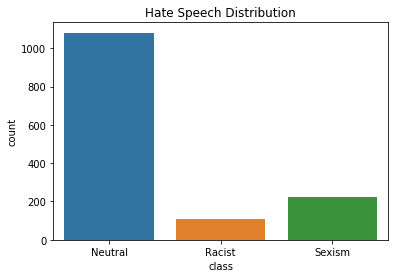

In [6]:
sns.countplot(x='class', data=df).set_title('Hate Speech Distribution')
df['class'].value_counts(normalize=True) * 100

## Comment length

In [7]:
df['length'] = df['text'].apply(len)
df.head()

,instance_id,id,user.id,created_at,text,class,length
0,0,1068438343363387392,1068429951865544704,Fri Nov 30 09:35:26 +0000 2018,"""RT @AmithWeerasing3: 2018-11-27 දින ඒකාබද්ධ ව...",Neutral,139
1,4,1068015734981152768,1062914938702770176,Thu Nov 29 05:36:08 +0000 2018,"""RT @AmithWeerasing3: මා UNP හෝ ඒකාබද්ධ විපක්ෂ...",Neutral,142
2,5,1068003223607435264,150942005,Thu Nov 29 04:46:25 +0000 2018,"""@dead_mans_creed @Wind_Desika කිමද මේ තරම් කො...",Neutral,88
3,10,1067733521052004353,2483063340,Wed Nov 28 10:54:43 +0000 2018,"""@MrThila_ @maalupaan @punchi_kella @anuwa01 @...",Neutral,99
4,11,1066688783557378049,2203056031,Sun Nov 25 13:43:18 +0000 2018,"""විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා.......",Neutral,82


## Comment Length Visualization

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F61132D288>,
      dtype=object)

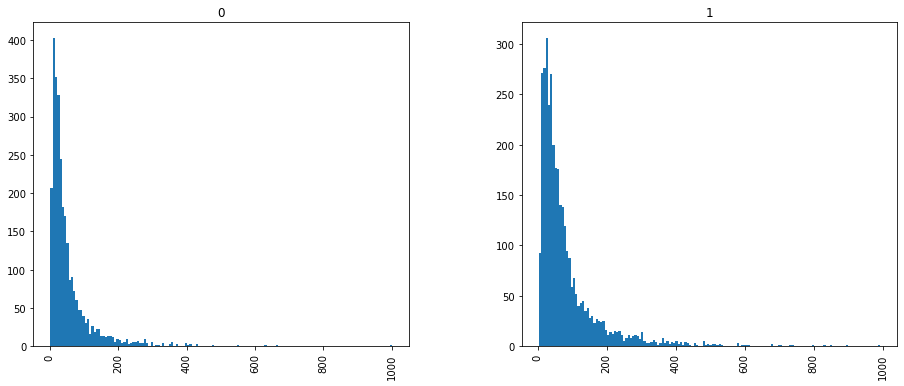

In [14]:

df.hist(column='length',by='label',figsize=(15,6), bins=150)


In [ ]:
df['word_count'] = df["comment"].apply(lambda x: len(str(x).split(" ")))
df['char_count'] = df["comment"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))
df['sentence_count'] = df["comment"].apply(lambda x: len(str(x).split(".")))
df['avg_word_length'] = df['char_count'] / df['word_count']
df['avg_sentence_lenght'] = df['word_count'] / df['sentence_count']
df.head()

In [ ]:
y = 'label'
def check_correlation_of_text_length(x,y):
    fig,ax = plt.subplots(nrows=1,ncols=2)
    fig.suptitle(x,fontsize=12)
    for i in df[y].unique():
        sns.distplot(df[df[y]==i][x], hist=True, kde=False, bins=10, hist_kws={"alpha":0.8}, axlabel="histogram", ax=ax[0])
        sns.distplot(df[df[y]==i][x], hist=False, kde=True, kde_kws={"shade":True}, axlabel="density",ax=ax[1])
    ax[0].grid(True)
    ax[0].legend(df[y].unique())
    ax[1].grid(True)
    plt.show()

In [ ]:
check_correlation_of_text_length("char_count",y)

In [ ]:
check_correlation_of_text_length("word_count",y)

In [ ]:
check_correlation_of_text_length("avg_word_length",y)

In [8]:
df[df.duplicated('text')]

,instance_id,id,user.id,created_at,text,class,length
16,28,1063377164647559168,1954236222,Fri Nov 16 10:24:07 +0000 2018,"""RT @ApiWenuwen: ඉතිහාසය ඉදිරියේ මෙවැනි හෙළිදර...",Neutral,140
78,104,1072371804549906432,751674122359476224,Tue Dec 11 06:05:36 +0000 2018,"""RT @LankadeepaNews: දෙමළ සන්ධානය එජාපයට හේත්ත...",Neutral,98
206,295,1072517609210433536,312686220,Tue Dec 11 15:44:59 +0000 2018,"""@Disapamok පිස්සු නැතිව දාන්න. ඔය වගේ සල්ලි ප...",Sexism,149
306,560,1072716841892511746,4867064842,Wed Dec 12 04:56:39 +0000 2018,"""දෙවෙනි සාර්ථක දවස උදෙසා යන ගමන් 🌺🙊""",Neutral,36
439,70,1075129710147969025,343755137,Tue Dec 18 20:44:32 +0000 2018,"""හොයලා හොයලා කොල්ලෙක් හොයා ගන්නම බැරි උනොත් මම...",Neutral,60
467,98,1075115398851248128,166556379,Tue Dec 18 19:47:40 +0000 2018,"""ලෝගා දාපු එක ඩුප්ලිකේට් ගහන්නත් හිතලා ආයේ අතෑ...",Neutral,180
589,228,1085163216823635968,125697659,Tue Jan 15 13:14:06 +0000 2019,"""@lishwebber @moogater සිරාවටම බං! උඩ යනවනං කො...",Neutral,81
816,473,991016123716923392,3714276020,Mon Apr 30 18:07:10 +0000 2018,"""RT @hrandil: මටත් අනිත් උන්ට ඕනෑ විදියට ඉන්න ...",Neutral,87
852,510,990963542412017666,1920039648,Mon Apr 30 14:38:14 +0000 2018,"""RT @duliponline: Officially පෝර්න් ඉන්ඩස්ට්‍ර...",Neutral,142
891,553,990951982947958784,799677397,Mon Apr 30 13:52:18 +0000 2018,"""Officially පෝර්න් ඉන්ඩස්ට්‍රි එක පිස්සු විකාර...",Neutral,271


In [9]:
df.duplicated('text').sum()

32

In [10]:
exclude = set(",.:;'\"-?!/´`%")
def removePunctuation(txt):
    return ''.join([(c if c not in exclude else " ") for c in txt])
    
def removeNumbers(txt):
    return ''.join(c for c in txt if not c.isnumeric())

## Remove puntuation

In [11]:
df['cleaned'] = df['text'].apply(lambda x: removePunctuation(x))
df.head()

,instance_id,id,user.id,created_at,text,class,length,cleaned
0,0,1068438343363387392,1068429951865544704,Fri Nov 30 09:35:26 +0000 2018,"""RT @AmithWeerasing3: 2018-11-27 දින ඒකාබද්ධ ව...",Neutral,139,RT @AmithWeerasing3 2018 11 27 දින ඒකාබද්ධ ව...
1,4,1068015734981152768,1062914938702770176,Thu Nov 29 05:36:08 +0000 2018,"""RT @AmithWeerasing3: මා UNP හෝ ඒකාබද්ධ විපක්ෂ...",Neutral,142,RT @AmithWeerasing3 මා UNP හෝ ඒකාබද්ධ විපක්ෂ...
2,5,1068003223607435264,150942005,Thu Nov 29 04:46:25 +0000 2018,"""@dead_mans_creed @Wind_Desika කිමද මේ තරම් කො...",Neutral,88,@dead_mans_creed @Wind_Desika කිමද මේ තරම් කො...
3,10,1067733521052004353,2483063340,Wed Nov 28 10:54:43 +0000 2018,"""@MrThila_ @maalupaan @punchi_kella @anuwa01 @...",Neutral,99,@MrThila_ @maalupaan @punchi_kella @anuwa01 @...
4,11,1066688783557378049,2203056031,Sun Nov 25 13:43:18 +0000 2018,"""විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා.......",Neutral,82,විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා ...


## Remove numbers

In [12]:
df['cleaned'] = df['cleaned'].apply(lambda x: removeNumbers(x))
df.head()

,instance_id,id,user.id,created_at,text,class,length,cleaned
0,0,1068438343363387392,1068429951865544704,Fri Nov 30 09:35:26 +0000 2018,"""RT @AmithWeerasing3: 2018-11-27 දින ඒකාබද්ධ ව...",Neutral,139,RT @AmithWeerasing දින ඒකාබද්ධ විපක්ෂයේ ම...
1,4,1068015734981152768,1062914938702770176,Thu Nov 29 05:36:08 +0000 2018,"""RT @AmithWeerasing3: මා UNP හෝ ඒකාබද්ධ විපක්ෂ...",Neutral,142,RT @AmithWeerasing මා UNP හෝ ඒකාබද්ධ විපක්ෂය...
2,5,1068003223607435264,150942005,Thu Nov 29 04:46:25 +0000 2018,"""@dead_mans_creed @Wind_Desika කිමද මේ තරම් කො...",Neutral,88,@dead_mans_creed @Wind_Desika කිමද මේ තරම් කො...
3,10,1067733521052004353,2483063340,Wed Nov 28 10:54:43 +0000 2018,"""@MrThila_ @maalupaan @punchi_kella @anuwa01 @...",Neutral,99,@MrThila_ @maalupaan @punchi_kella @anuwa @da...
4,11,1066688783557378049,2203056031,Sun Nov 25 13:43:18 +0000 2018,"""විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා.......",Neutral,82,විමලයා ගොනෙක් වගෙ stage එකෙ මෑරෙන්න හදනවා ...


## Most Common words in Dataset

In [13]:
from collections import Counter

plt.rc('font', family='Lohit Devanagari')

results = Counter()
df.cleaned.str.split().apply(results.update)

most = results.most_common()
print(most[:10])

[('https', 355), ('t', 352), ('co', 351), ('නෑ', 194), ('එක', 173), ('පුක', 154), ('RT', 148), ('මේ', 143), ('කියලා', 128), ('ඒ', 123)]


## Most common words in Hate label

In [14]:
words = [word for i in df[df['class'] == 'Sexism']['cleaned'].str.split() for word in i]

counter = Counter(words)
most = counter.most_common(20)
    
most

[('පුක', 132),
 ('https', 38),
 ('t', 38),
 ('co', 38),
 ('එක', 30),
 ('මේ', 27),
 ('RT', 27),
 ('😂', 24),
 ('නම්', 24),
 ('නෑ', 23),
 ('උන්', 21),
 ('කැරි', 20),
 ('වැඩ', 19),
 ('වගේ', 18),
 ('පොන්න', 18),
 ('කියලා', 17),
 ('අනේ', 17),
 ('එපා', 16),
 ('ක්\u200dරිකට්', 16),
 ('හුත්තො', 16)]

## Most Common words in Non hate label

In [20]:
words = [word for i in df[df['class'] == 'Racist']['cleaned'].str.split() for word in i]

counter = Counter(words)
most = counter.most_common(20)
    
most

[('මේ', 347),
 ('එක', 194),
 ('ඒ', 192),
 ('ඔබ', 188),
 ('අපේ', 149),
 ('අපි', 146),
 ('වගේ', 143),
 ('එකක්', 143),
 ('නෑ', 140),
 ('කරන්න', 138),
 ('සරණයි', 123),
 ('නම්', 110),
 ('කරන', 110),
 ('ඉන්න', 109),
 ('රට', 102),
 ('එපා', 99),
 ('තෙරුවන්', 93),
 ('ඒක', 90),
 ('කියලා', 89),
 ('සියලු', 88)]